<a href="https://colab.research.google.com/github/nishmatk/works/blob/master/latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using TensorFlow backend.


170500096/170498071 [==============================] - 6s 0us/step
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


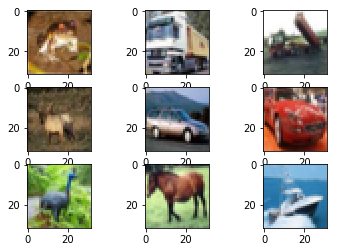

In [0]:
# example of loading the cifar10 dataset
from matplotlib import pyplot
from keras.datasets import cifar10
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i])
# show the figure
pyplot.show()

In [0]:
from keras.utils import to_categorical
# load train and test dataset
#def load_dataset():
	# load dataset
(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
print (testY[4])
trainY = to_categorical(trainY)
testY = to_categorical(testY)
	#return trainX, trainY, testX, testY
print (testY[4])


[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [0]:
#def prep_pixels(train, test):
	# convert from integers to floats
	trainX = trainX.astype('float32')
	testX = testX.astype('float32')
	# normalize to range 0-1
	trainX = trainX / 255.0
	testX = testX / 255.0
	# return normalized images
	#return train_norm, test_norm

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from keras.constraints import max_norm
from keras import optimizers

In [0]:
# Create the model
from keras.optimizers import SGD
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32,32,3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=max_norm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=max_norm(3)))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

W0729 09:52:34.738348 139883296462720 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0729 09:52:34.747045 139883296462720 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_17 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_18 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 16, 16, 64)        36928     
__________

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
history=model.fit(trainX,trainY,validation_data=(testX,testY),epochs=25,batch_size=64)

W0729 09:52:51.764013 139883296462720 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 19s 375us/step - loss: 1.9443 - acc: 0.2786 - val_loss: 1.6702 - val_acc: 0.4038
Epoch 2/25
50000/50000 [==============================] - 11s 220us/step - loss: 1.5291 - acc: 0.4428 - val_loss: 1.4413 - val_acc: 0.4851
Epoch 3/25
50000/50000 [==============================] - 11s 221us/step - loss: 1.3479 - acc: 0.5093 - val_loss: 1.2440 - val_acc: 0.5515
Epoch 4/25
50000/50000 [==============================] - 11s 218us/step - loss: 1.2199 - acc: 0.5597 - val_loss: 1.1117 - val_acc: 0.5992
Epoch 5/25
50000/50000 [==============================] - 11s 214us/step - loss: 1.1112 - acc: 0.6025 - val_loss: 1.0962 - val_acc: 0.6042
Epoch 6/25
50000/50000 [==============================] - 11s 215us/step - loss: 1.0251 - acc: 0.6346 - val_loss: 1.0021 - val_acc: 0.6422
Epoch 7/25
50000/50000 [==============================] - 11s 215us/step - loss: 0.9501 - acc: 0.6624 - val_loss: 0.

In [0]:

# evaluate model
acc = model.evaluate(testX, testY, verbose=0)
print(acc[1]*100)

79.03


In [0]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

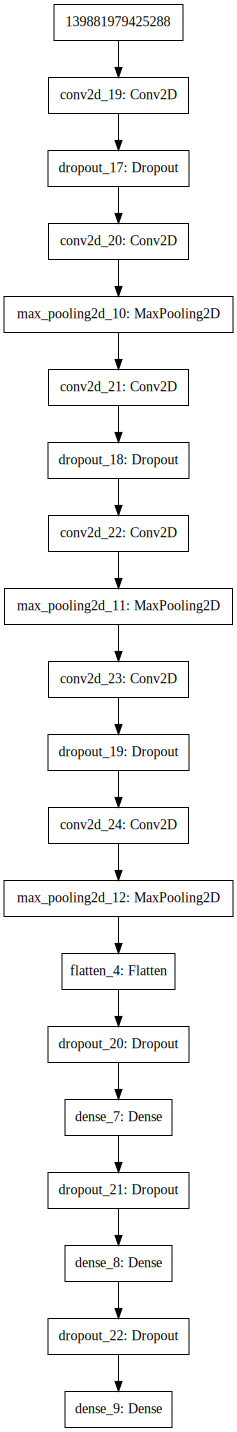

In [0]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))


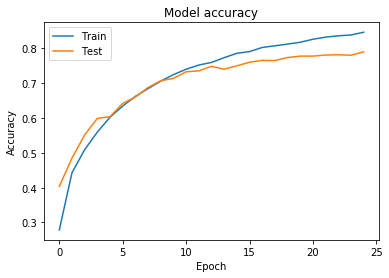

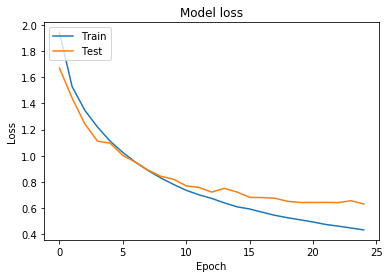

In [0]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt

#history = model.fit(trainX, trainY, validation_split=0.25, epochs=50, batch_size=16, verbose=1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

https://mc.ai/how-to-save-and-upload-deep-learning-machine-learning-models-in-google-colab-using-google-drive/

In [0]:
from google.colab import drive
drive.mount('/ccc/')

Mounted at /ccc/


In [0]:
from keras.models import load_model

model.save('/ccc/My Drive/1/my_model223322.h5')  

In [0]:
model_test = '/ccc/My Drive/1/my_model223322.h5'

In [0]:
model_test = 

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [0]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# 2. Save Keras Model or weights on google drive

# create on Colab directory
model.save('model.h5')    
model_file = drive.CreateFile({'title' : 'model.h5'})
model_file.SetContentFile('model.h5')
model_file.Upload()

W0729 10:40:41.584201 139883296462720 __init__.py:44] file_cache is unavailable when using oauth2client >= 4.0.0 or google-auth
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import Lock

In [0]:
drive.CreateFile({'id': model_file.get('id')})

GoogleDriveFile({'id': '1FhRBcHdjERl1UmnkWFKvUmRNe3h1IYEj'})